# Contextually Supervised Source Separation (CSSS)
This packages deploys contextually supervised source separation (CSSS) techniques in python. CSSS was originally decribed by Wytock and Kolter in [1] and we follow their original notation in this docuemntation.  We also include updates and extensions of the origianl CSSS method as created by the authors of this package in their applied work [2-4]. 	

CSSS is the disaggregation of a time series of source signals from observations of their sum. Equation~\ref{} displays this problem where the vector $\bar y$ is observed and each source signal, $y_i$ is unobserved. 
\begin{equation}
\bar y = \sum_{i=0}^{k} y_i
\end{equation}

Contextual separation is achieved by (A) relating each source signal to exogenous observations, and (B) exploiting known regularity in the source signals. 
Equation~\ref{} displays the general form of this optimization as presented in [1]. $\ell_i()$ is a cost function to fit the source signal, $y_i$ to the exogenous variables, $X_i$, using a linear transformation with parameters $theta_i$; $g_i()$ is a regularization term applied to the source signal which would elicit smoothness or other periodic regularity; and $h_i()$ is a regularization term for the parameters $\theta_i$. 

\begin{align}
\min_{Y,\theta}\hspace{5mm}& \sum_{i=0}^{k} \{ \ell_i(y_i, X_i \theta_i) + g_i(y_i) + h_i(\theta_i)\}\\
\mbox{s.t.,}\hspace{5mm}&  \bar y = \sum_{i=0}^{k} y_i
\end{align}


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import cvxpy as cvp
import CSSS as CSSS
import time

%matplotlib inline

In [6]:
## Create an example case where we separate two signals based on sin functions. 
N = 10

X1 = np.sin(np.arange(N)*2*np.pi/N)*50
Y1 = X1 + np.random.normal(0,4,N) + 10


X2 = np.array([5*elem/100+2 for elem in range(0,N)])
Y2 = X2 + np.random.normal(0,5,N)

Y = Y1 + Y2 


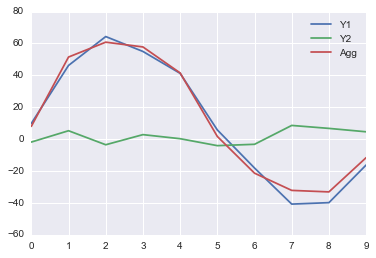

In [7]:
plt.plot(Y1,label='Y1')
plt.plot(Y2,label='Y2')


plt.plot(Y,label='Agg')
plt.legend()

In [8]:
# Try it out. 
CSSEtry = CSSS.CSSS(Y)  ## Instantiate model with aggregate signal, Y
CSSEtry.addSource(np.vstack((np.ones((1,N)),X1)).transpose(), alpha = 1, name = 'Y1')  ## Add a model for Y1
CSSEtry.addSource(X2, alpha = 1, name = 'Y2') ## Add a model for Y2

## Constrain Y2 to be greater than -1 just to try out the constraints. 
#CSSEtry.addConstraint(CSSEtry.models['Y2']['source'] > -10 )
start=time.time()
CSSEtry.constructSolve()
print(time.time()-start)
    


Setting theta reg cost to 0
Setting theta reg cost to 0
0.0556480884552


In [9]:
import time
start=time.time()
[dual_obj,norm_resid_equality,u]=CSSEtry.admmSolve(10, MaxIter=100, ABSTOL=0.001, RELTOL=0.01,verbose=True)
print(time.time()-start)

Verbose on
Initialized all sources
('iter_num', 's_norm', 'eps_dual', 'r_norm', 'eps_pri')
(1, 23.806628587018253, 0.049350531654190198, 0.47618480846621314, 0.0017320508075688772)
(2, 17.20141762042395, 0.083757426078790678, 0.3440689442465989, 0.0017320508075688772)
(3, 12.430663084432572, 0.108649830502671, 0.24892404423905914, 0.0017320508075688772)
(4, 8.9842170887245754, 0.12661973154250417, 0.17969901039833647, 0.0017320508075688772)
(5, 6.4766472250971381, 0.13957216791784871, 0.12952436375346871, 0.0017320508075688772)
(6, 4.6538921761726728, 0.14884870309157394, 0.092765351738645599, 0.0017320508075688772)
(7, 3.3720889553188185, 0.15557921712730841, 0.067305140357569834, 0.0017320508075688772)
(8, 2.4424238658778288, 0.1604644238815095, 0.048852067542188182, 0.0017320508075688772)
(9, 1.7614200923439547, 0.16398485922942541, 0.03520435347998551, 0.0017320508075688772)
(10, 1.2716672175831931, 0.16652730918755057, 0.025424499581837894, 0.0017320508075688772)
(11, 0.9193897287

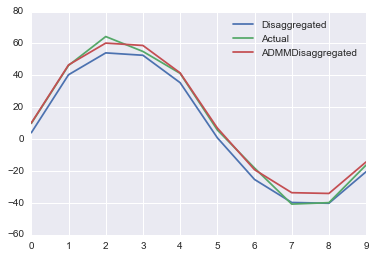

In [10]:
plt.plot(CSSEtry.models['Y1']['source'].value, label = 'Disaggregated')

#plt.plot(CSSEtry.models['Y1']['regressor'] * CSSEtry.models['Y1']['theta'].value, label = 'Modeled')
plt.plot(Y1, label = 'Actual')
plt.plot(CSSEtry.models['Y1']['admmSource'], label = 'ADMMDisaggregated')

plt.legend()
plt.show()

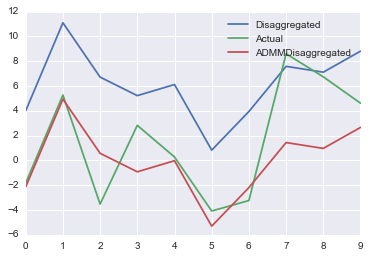

In [11]:
plt.plot(CSSEtry.models['Y2']['source'].value, label = 'Disaggregated')

#plt.plot(CSSEtry.models['Y2']['regressor'] * CSSEtry.models['Y2']['theta'].value, label = 'Modeled')
plt.plot(Y2, label = 'Actual')
plt.plot(CSSEtry.models['Y2']['admmSource'], label = 'ADMMDisaggregated')

plt.legend()
plt.show()

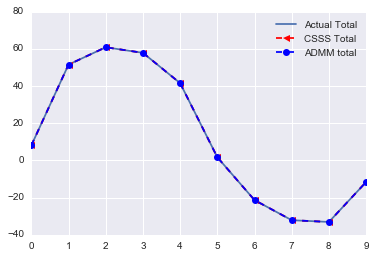

In [12]:
plt.plot(Y, label = 'Actual Total')
plt.plot(CSSEtry.models['Y2']['source'].value+CSSEtry.models['Y1']['source'].value, '--<r',label = 'CSSS Total',)
plt.plot(CSSEtry.models['Y2']['admmSource']+CSSEtry.models['Y1']['admmSource'],'--ob', label = 'ADMM total',)

plt.legend()
plt.show()

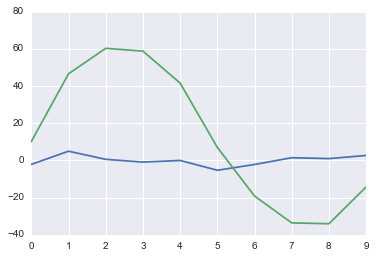

In [13]:
plt.plot(CSSEtry.models['Y2']['admmSource'], label = 'ADMMDisaggregated')
plt.plot(CSSEtry.models['Y1']['admmSource'], label = 'ADMMDisaggregated')
